# 4. Rispondere alle domande
Trasforma le seguenti richiesti in formule per estrarre infromazioni dal dataframe
- Mostrami le vendite maggiori di 10

- Mostrami i dati del 2018

- Mostrami le vendite maggiori di 13 e l'anno è il 2018

- Mostrami tutto TRANNE i casi in cui le vendite sono maggiori di 13 e l'anno è il 2018

- Mostrami i dati dove le vendite divise per 3 sono maggiori di 3

- Mostrami i dipendenti i cui nomi sono alfabeticamente dopo la J



In [19]:
import numpy as np
import pandas as pd

sales = pd.DataFrame(
    data={
        "employee": [
            "Katrina",
            "Guanyu",
            "Jan",
            "Roman",
            "Jacqueline",
            "Paola",
            "Esperanza",
            "Alaina",
            "Egweyn",
        ],
        "sales": [14, 17, 6, 12, 8, 3, 7, 15, 5],
        "year": [2018, 2019, 2020, 2018, 2020, 2019, 2019, 2020, 2020],
    }
)
sales


,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [20]:
sales[sales['sales']>10]

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [21]:
sales.query("sales > 10")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [22]:
sales[sales['year']==2018]

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [23]:
sales.query("year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [24]:
sales[(sales['sales']>13) & (sales['year']==2018)]

,employee,sales,year
0,Katrina,14,2018


In [25]:
sales.query("sales > 10 & year == 2018")

,employee,sales,year
0,Katrina,14,2018
3,Roman,12,2018


In [26]:
sales.query("not (sales > 13 and year == 2018)")

,employee,sales,year
1,Guanyu,17,2019
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019
6,Esperanza,7,2019
7,Alaina,15,2020
8,Egweyn,5,2020


In [27]:
sales.query("(sales/3) > 3")

,employee,sales,year
0,Katrina,14,2018
1,Guanyu,17,2019
3,Roman,12,2018
7,Alaina,15,2020


In [28]:
sales.query("employee > 'J'")

,employee,sales,year
0,Katrina,14,2018
2,Jan,6,2020
3,Roman,12,2018
4,Jacqueline,8,2020
5,Paola,3,2019


# 5. Analisi di un dataset di video giochi
1. Quanti videogiochi sono stati pubblicati
2. Quali sono i generi più popolari? Mostralo con un bar plot
3. Plotta l'evoluzione del numero di giochi pubblicati nel tempo
4. Prova a riprodurre questo plot

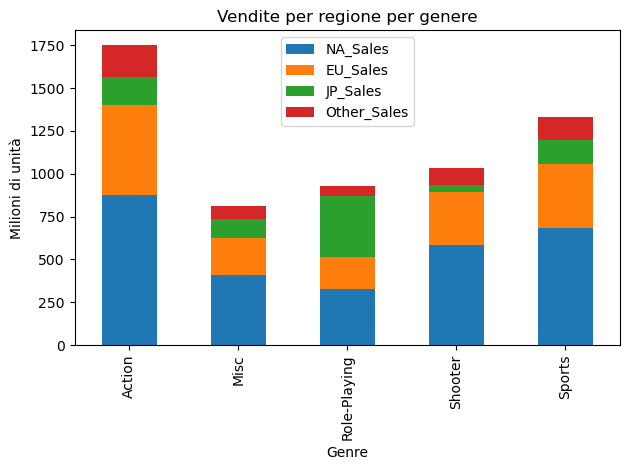


In [29]:
# Import dei pacchetti
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Caricamento del dataset
url = 'https://zenodo.org/record/5898311/files/vgsales.csv'
df = pd.read_csv(url)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [36]:
df.shape[0]

16598

In [37]:
num_games = df['Name'].nunique
num_games

<bound method IndexOpsMixin.nunique of 0                                              Wii Sports
1                                       Super Mario Bros.
2                                          Mario Kart Wii
3                                       Wii Sports Resort
4                                Pokemon Red/Pokemon Blue
                               ...                       
16593                  Woody Woodpecker in Crazy Castle 5
16594                       Men in Black II: Alien Escape
16595    SCORE International Baja 1000: The Official Game
16596                                          Know How 2
16597                                    Spirits & Spells
Name: Name, Length: 16598, dtype: object>

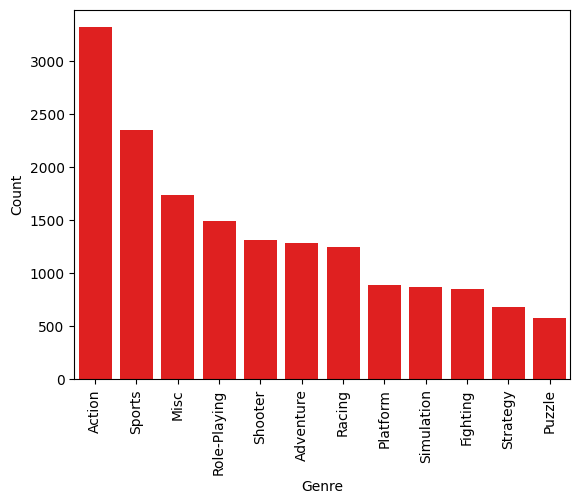

In [31]:
gen = df['Genre'].value_counts().reset_index()
gen.columns = ['Genre', 'Count']

sns.barplot(x='Genre', y='Count', data=gen, color='red')

plt.xticks(rotation=90)   
plt.show()

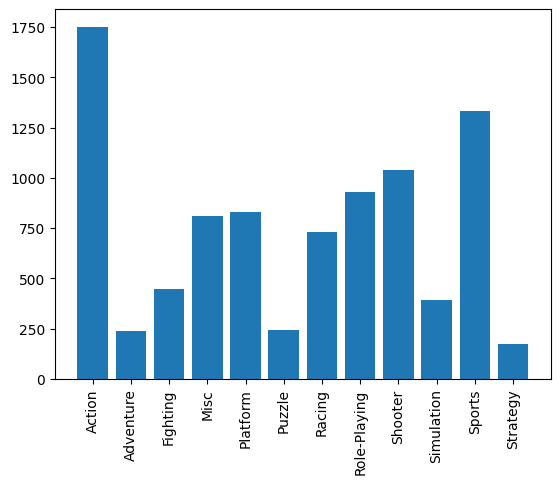

In [ ]:
#soluz studente

plottable = pd.DataFrame(df.groupby('Genre', as_index=False)['Global_Sales'].sum())

plt.bar(x=plottable['Genre'], height=plottable['Global_Sales'])
plt.xticks(rotation=90)   
plt.show()


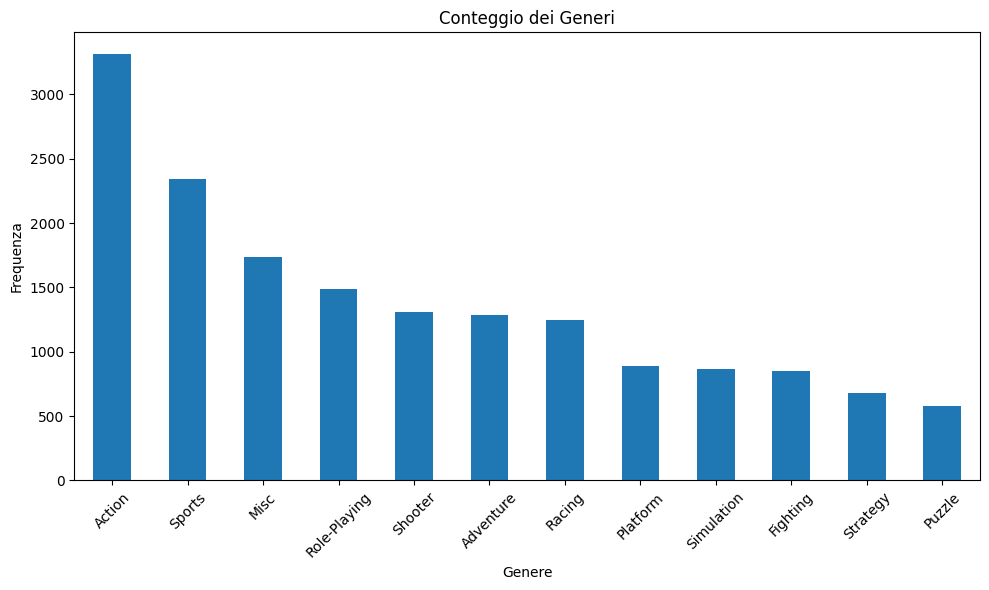

In [ ]:
#soluz prof real
genre_count = df['Genre'].value_counts()

plt.figure(figsize=(10, 6))
genre_count.plot(kind='bar')
plt.title('Conteggio dei Generi')
plt.xlabel('Genere')
plt.ylabel('Frequenza')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

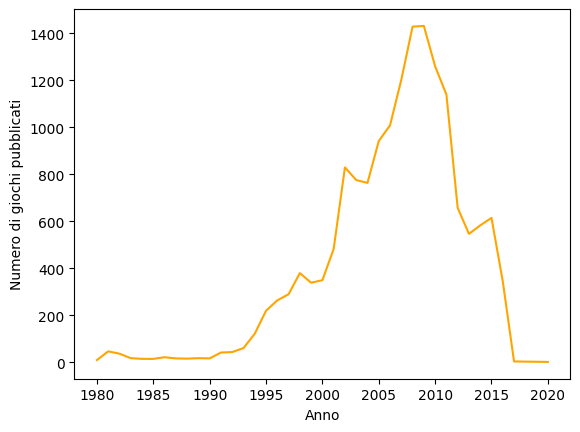

In [32]:
anno = df['Year'].value_counts().sort_index()

sns.lineplot(x=anno.index, y=anno.values, color='orange')
plt.xlabel('Anno')
plt.ylabel('Numero di giochi pubblicati')
plt.show()

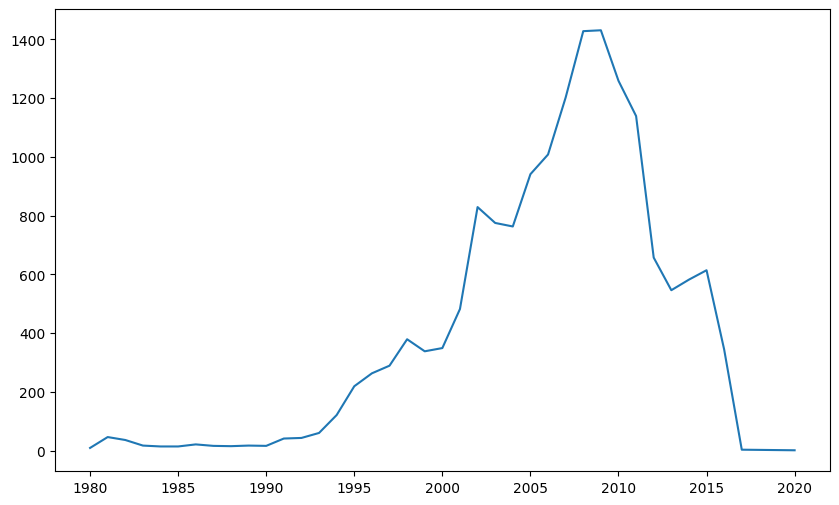

In [ ]:
#soluz prof
anni = df['Year'].value_counts().sort_index()

plt.figure(figsize=(10,6))
plt.plot(anni)

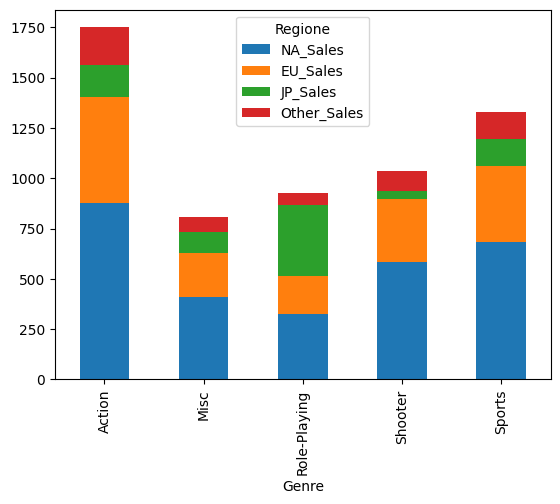

In [34]:
gen = df['Genre'].value_counts().head(5)
gen = gen.sort_index()
#print(gen)

sal = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
#print(sal)

table = sal.loc[gen.index]
#print(table)
table = table.reset_index()

table.plot(kind='bar', x='Genre', stacked=True)
plt.legend(title='Regione')
plt.xticks(rotation=90)   
plt.show()

<Figure size 1000x600 with 0 Axes>

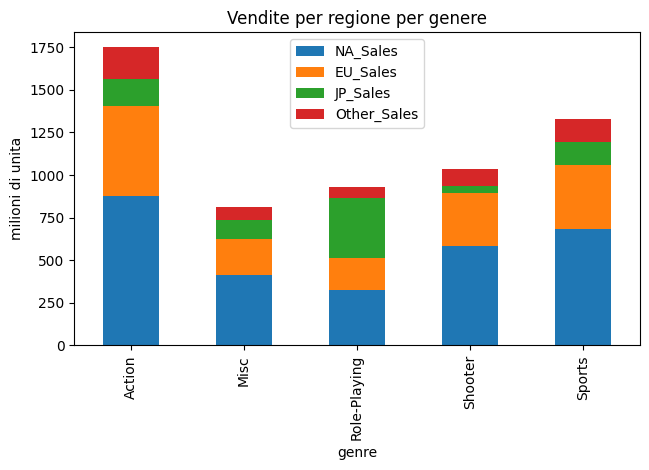

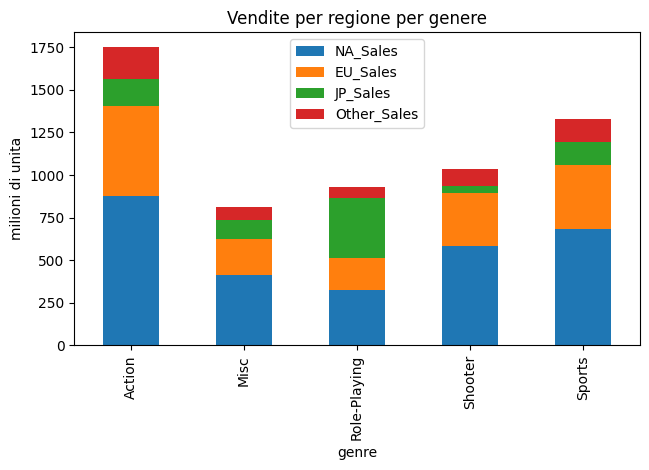

In [53]:
#soluz prof

generi_migliori = df.groupby('Genre')['Name'].count().sort_values(ascending=False).head(5)

#due opzioni
vendite_gen_mig = df[df['Genre'].isin(generi_migliori.index)].groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

vendite_gen_mig2 = df[df['Genre'].apply(lambda generi: generi in generi_migliori.index)].groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

plt.figure(figsize=(10, 6))
vendite_gen_mig.plot(stacked=True, kind="bar")
plt.title("Vendite per regione per genere")
plt.tight_layout()
plt.xlabel("genre")
plt.ylabel("milioni di unita")
plt.show()

vendite_gen_mig2.plot(stacked=True, kind="bar")
plt.title("Vendite per regione per genere")
plt.tight_layout()
plt.xlabel("genre")
plt.ylabel("milioni di unita")
plt.show()

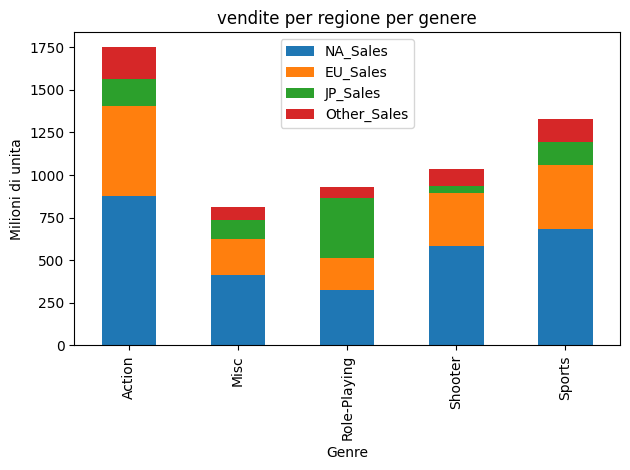

In [54]:
top_generi = genre_count.nlargest(5).index
df_top = df[df['Genre'].apply(lambda g: g in top_generi)]
vendite_regioni = df_top.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
vendite_regioni.plot(kind='bar', stacked=True, title="vendite per regione per genere")
plt.ylabel('Milioni di unita')
plt.tight_layout()
plt.show()